# 필요 패키지 임포트

In [137]:
import pandas as pd
import os

#TEST

In [138]:
test_file_paths = [
    "/content/Bitcoin Historical Data (1).csv",
    "/content/Copper Futures Historical Data.csv",
    "/content/Crude Oil WTI Futures Historical Data.csv",
    "/content/Gold Futures Historical Data.csv",
    "/content/Nasdaq 100 Historical Data.csv",
    "/content/US Dollar Index Historical Data.csv",
    "/content/United States 10-Year Bond Yield Historical Data.csv",
    "/content/United States 2-Year Bond Yield Historical Data.csv",
    "/content/러셀 2000 지수 과거 데이터.csv",

    # 추가 파일 경로
]

# 각 파일의 이름을 열 이름으로 사용
test_column_names = [
    "Bitcoin",
    "Copper",
    "Crude_Oil_WTI",
    "Gold",
    "Nasdaq_100",
    "Dollar_Index",
    "10YBond",
    "2YBond",
    "Rusell2000"
]

# 여러 엑셀파일을 하나의 데이터프레임으로 합치는 함수 관련

In [139]:
def concat_excel(file_paths, columns):
  '''
  같은 유형의 데이터를 담은 여러 엑셀파일을 하나의 데이터프레임으로
  합치는 함수

  file_paths(type=string) : 엑셀파일 경로
  columns(type=list) : 각 엑셀파일에서 선택할 데이터의 column이름
  '''
  dfs = []
  for f in file_paths:
    if f.endswith('.xlsx'): # 확장자가 엑셀이면
      df = pd.read_excel(f)
      n_df = df[columns].copy() # 원하는 column만 빼오기
      dfs.append(n_df) # dfs에 데이터프레임 저장
    if f.endswith('.csv'):
      df = pd.read_csv(f)
      n_df = df[columns].copy()
      dfs.append(n_df)
    else:
      print("지원하지 않는 파일형식입니다.")
  m_df = pd.concat(dfs, axis=1) # 엑셀파일 열 기준으로 합치기
  return m_df

In [140]:
def change_col_name(df, columns):
  '''
  데이터프레임의 column이름을 바꾸는 함수

  df(type=pandas.DataFrame) : column이름 바꿀 데이터프레임
  columns(type=list) : 바꿀 column이름
  '''
  df.columns = columns

In [141]:
def change_dtype_to_float(df, columns):
  '''
  데이터프레임의 dtype을 float으로 바꾸는 함수

  df(type=pandas.DataFrame) : dtype 바꿀 데이터프레임
  columns(type=list) : datatype을 바꿀 column이름
  '''
  for col in columns:
    for i, val in enumerate(df[col]):
      print(f'{col} = {val}')
      if type(val) == str:
        if ',' in val:
          val = val.replace(',', '')
          fval = float(val)
        if val.endswith('M'):
          val = val.replace('.', '').replace('M', '')
          fval = float(val)
          fval *= 1_000_000
        elif val.endswith('K'):
          val = val.replace('.', '').replace('K', '')
          fval = float(val)
          fval *= 1_000
        elif val.endswith('B'):
          val = val.replace('.', '').replace('B', '')
          fval = float(val)
          fval *= 1_000_000_000
        else:
          fval = float(val)
      else:
        fval = float(val)
      df.loc[i, col] = fval
      print(fval)

In [142]:
def save_df(df, file_name):
  '''
  데이터프레임 저장하기

  df(type=pandas.DataFrame) : 로컬에 저장할 데이터프레임
  file_name(type=string) : 저장할 파일 이름
  '''
  df.to_excel(file_name, index=False)

# 플롯 그리는 함수

In [143]:
def draw_heatmap(dfs, x_num, y_num):
  '''
  상관관계 히트맵 그리는 함수

  dfs(type=list) : 여러 데이터프레임을 담은 리스트
  x_num(type=int) : 가로로 히트맵 몇 개 그릴 건지
  y_num(type=int) : 세로로 히트맵 몇 개 그릴 건지
  '''
  import seaborn as sns
  import matplotlib.pyplot as plt

  fig, axs = plt.subplots(x_num, y_num, figsize=(12, 16)) # 하나의 플롯에 몇 개의 subplot을 담을지 설정
  axs = axs.flatten() # 축을 1차원으로 변환

  for i, df in enumerate(dfs):
    corr = df.corr() # 히트맵을 그리기 위해 데이터프레임의 상관계수 계산
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axs[i]) # 히트맵 그리기
    axs[i].set_title(df.columns[0])

In [144]:
def draw_graph(dfs, columns, figsize=(20, 16)):
  '''
  여러 데이터프레임의 데이터의 그래프를 그리는 함수

  dfs(type=list) : 여러 데이터프레임을 담은 리스트
  figsize(type=tuple) : 그래프 크기
  columns(type=list) : 그래프에 표시할 데이터의 column이름(각 데이터프레임들의 column이름은 같아야함)
  '''
  import matplotlib.pyplot as plt

  # markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

  for df in dfs:
    for col in columns:
      plt.plot(df.index, df[col], label=f'{col}')
  plt.xlabel('Date')
  plt.ylabel(f'{df.columns[0]} Value')
  plt.legend()
  plt.grid(True)
  plt.show()

# 분석

In [145]:
file_paths = [
    "/content/Bitcoin Historical Data (1).csv",
    "/content/Copper Futures Historical Data.csv",
    "/content/Crude Oil WTI Futures Historical Data.csv",
    "/content/Gold Futures Historical Data.csv",
    "/content/Nasdaq 100 Historical Data.csv",
]
column_names = [
    "Bitcoin",
    "Bitcoin_Vol",
    "Copper",
    "Copper_Vol",
    "Crude_Oil_WTI",
    "Crude_Oil_WTI_Vol",
    "Gold",
    "Gold_Vol",
    "Nasdaq_100",
    "Nasdaq_100_Vol",
    # "Date",
]

In [146]:
df = concat_excel(file_paths, ['Price', 'Vol'])
# df['Date'] = pd.read_csv("/content/Bitcoin Historical Data (1).csv")['Date']
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.iloc[::-1].reset_index(drop=True)
df

,Price,Vol,Price,Vol,Price,Vol,Price,Vol,Price,Vol
0,"67,211.90",65.59K,4.0595,NaN,76.95,NaN,"2,372.90",NaN,"19,032.39",410.87M
1,"64,037.80",35.11K,4.1090,NaN,77.59,NaN,"2,415.70",NaN,"19,754.34",246.69M
2,"63,785.50",72.43K,4.1605,56.02K,76.96,417.94K,"2,407.30",171.19K,"19,822.87",309.63M
3,"65,503.80",75.26K,4.1975,72.58K,79.78,27.34K,"2,394.70",197.56K,"19,522.62",365.45M
4,"67,854.00",133.53K,4.2365,60.98K,80.13,83.80K,"2,399.10",254.41K,"19,705.09",337.67M
...,...,...,...,...,...,...,...,...,...,...
4994,0.1,2.16K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,0.1,0.58K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,0.1,0.26K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,0.1,0.57K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df = df.dropna()
change_col_name(df, column_names)
df

,Bitcoin,Bitcoin_Vol,Copper,Copper_Vol,Crude_Oil_WTI,Crude_Oil_WTI_Vol,Gold,Gold_Vol,Nasdaq_100,Nasdaq_100_Vol
2,"63,785.50",72.43K,4.1605,56.02K,76.96,417.94K,"2,407.30",171.19K,"19,822.87",309.63M
3,"65,503.80",75.26K,4.1975,72.58K,79.78,27.34K,"2,394.70",197.56K,"19,522.62",365.45M
4,"67,854.00",133.53K,4.2365,60.98K,80.13,83.80K,"2,399.10",254.41K,"19,705.09",337.67M
5,"62,050.00",148.08K,4.2795,91.54K,82.82,95.70K,"2,456.40",192.77K,"19,799.14",420.20M
6,"67,594.10",78.07K,4.4085,60.75K,82.85,257.44K,"2,459.90",259.54K,"20,398.62",240.94M
...,...,...,...,...,...,...,...,...,...,...
3658,595,3.58K,2.9320,46.20K,79.30,358.82K,"1,112.60",232.58K,"1,892.59",231.54M
3659,598.9,3.65K,3.1340,34.65K,76.56,322.41K,"1,140.00",188.03K,"1,876.72",239.02M
3660,606.4,3.58K,3.2315,28.67K,77.44,34.22K,"1,130.50",144.70K,"1,878.42",215.11M
3661,619.1,3.30K,3.1880,31.24K,76.54,169.55K,"1,143.00",165.71K,"1,888.43",215.84M


In [148]:
%%capture
change_dtype_to_float(df, ['Bitcoin', 'Bitcoin_Vol', 'Copper', 'Copper_Vol', 'Crude_Oil_WTI',
       'Crude_Oil_WTI_Vol', 'Gold', 'Gold_Vol', 'Nasdaq_100',
       'Nasdaq_100_Vol'])
df = df.dropna()
df

In [149]:
# change_dtype_to_float함수가 적용된 df를 output이라는 이름의 엑셀파일로 저장
# df.to_excel('output.xlsx', index=False)

In [150]:
weekly_df = df.rolling(window=7).mean().round(2) # 주간 평균으로 변환
weekly_df = weekly_df.iloc[6::7] # 1주일 간격으로 데이터필터링
weekly_df

,Bitcoin,Bitcoin_Vol,Copper,Copper_Vol,Crude_Oil_WTI,Crude_Oil_WTI_Vol,Gold,Gold_Vol,Nasdaq_100,Nasdaq_100_Vol
8,67436.39,10851285.71,4.43,6717285.71,81.90,24798285.71,2436.39,23868571.43,20215.42,3.108500e+10
16,69202.90,10688857.14,4.54,6927857.14,82.46,30893857.14,2364.46,20473571.43,20102.47,3.007671e+10
23,61990.01,9265857.14,4.41,1580571.43,81.37,23243142.86,2333.64,10640571.43,19716.72,4.619043e+10
31,51805.36,4080142.86,4.52,3335428.57,77.71,27115428.57,2343.20,18612571.43,18998.34,2.529086e+10
38,50771.21,6246285.71,4.67,3423428.57,76.50,35317857.14,2360.54,18920000.00,18688.35,2.927443e+10
...,...,...,...,...,...,...,...,...,...,...
2154,6394.07,10892000.00,2.58,1083142.86,48.91,29331000.00,1189.21,14384285.71,4396.63,1.808971e+10
2344,1772.23,6627857.14,2.98,3293571.43,62.77,33252142.86,1276.84,13309000.00,3863.11,1.898243e+10
2491,701.16,4368142.86,3.10,3025714.29,101.92,22453428.57,1284.71,13861000.00,3326.62,1.531229e+10
2653,557.13,4857571.43,3.29,1804285.71,96.75,15670571.43,1386.99,21814428.57,2915.38,2.243100e+10


In [173]:
# 일주일 전과 데이터 차이 구하기(diff의 period=1로 설정)
target, target_vol = 'Nasdaq_100', 'Nasdaq_100_Vol' # target과 target_vol은 원하는 column을 선택하면 됨
weekly_df_nasdaq = weekly_df[[target,target_vol]].copy() # 원하는 행을 선택해 따로 DataFrame으로 만듦
weekly_df_nasdaq = weekly_df_nasdaq.iloc[::-1] # 데이터순서를 시간기준으로 오름차순으로 변경(가장 오래된 데이터가 맨 위로 가게 변경)
weekly_df_nasdaq['Price_diff'] = weekly_df_nasdaq[target].diff() # 일주일 전과 가격 차이
weekly_df_nasdaq['Volume_diff'] = weekly_df_nasdaq[target_vol].diff() # 일주일 전과 거래량 차이
weekly_df_nasdaq['Return_rate'] = (weekly_df_nasdaq[target].diff() / weekly_df_nasdaq[target].shift(1)) * 100 # 직전시점대비 가격변화율(수익률). 단위 퍼센트
weekly_df_nasdaq['Volume_change_rate'] = (weekly_df_nasdaq[target_vol].diff() / weekly_df_nasdaq[target_vol].shift(1)) * 100 # 직전시점대비 거래량 변화율. 단위 퍼센트
weekly_df_nasdaq['Price_change_ratio'] = abs((weekly_df_nasdaq[target].diff() / weekly_df_nasdaq[target].shift(1))) * 100 # 직전시점대비 가격변동성(수익률X). 퍼센트 단위
weekly_df_nasdaq['Volume_change_ratio'] = abs((weekly_df_nasdaq[target_vol].diff() / weekly_df_nasdaq[target_vol].shift(1))) * 100 # 직전시점대비 거래량변동성. 퍼센트 단위
weekly_df_nasdaq = weekly_df_nasdaq.dropna()
weekly_df_nasdaq = weekly_df_nasdaq.reset_index(drop=True)
weekly_df_nasdaq

,Nasdaq_100,Nasdaq_100_Vol,Price_diff,Volume_diff,Return_rate,Volume_change_rate,Price_change_ratio,Volume_change_ratio
0,2915.38,2.243100e+10,319.74,3.262429e+09,12.318349,17.019675,12.318349,17.019675
1,3326.62,1.531229e+10,411.24,-7.118714e+09,14.105880,-31.736054,14.105880,31.736054
2,3863.11,1.898243e+10,536.49,3.670143e+09,16.127180,23.968615,16.127180,23.968615
3,4396.63,1.808971e+10,533.52,-8.927143e+08,13.810634,-4.702845,13.810634,4.702845
4,4320.46,2.908014e+10,-76.17,1.099043e+10,-1.732463,60.755125,1.732463,60.755125
...,...,...,...,...,...,...,...,...
517,18688.35,2.927443e+10,357.85,6.269286e+09,1.952211,27.251670,1.952211,27.251670
518,18998.34,2.529086e+10,309.99,-3.983571e+09,1.658734,-13.607683,1.658734,13.607683
519,19716.72,4.619043e+10,718.38,2.089957e+10,3.781278,82.636865,3.781278,82.636865
520,20102.47,3.007671e+10,385.75,-1.611371e+10,1.956461,-34.885397,1.956461,34.885397


In [152]:
colors = ['blue' if v < 0 else 'red' for v in weekly_df_nasdaq['Volume_diff']] # 이번주 거래량이 어제보다 많으면 red, 적으면 blue
labels = ['-' if p < 0 else '+' for p in weekly_df_nasdaq['Price_diff']] # 이번주 가격이 어제보다 비싸면 +, 싸면 -

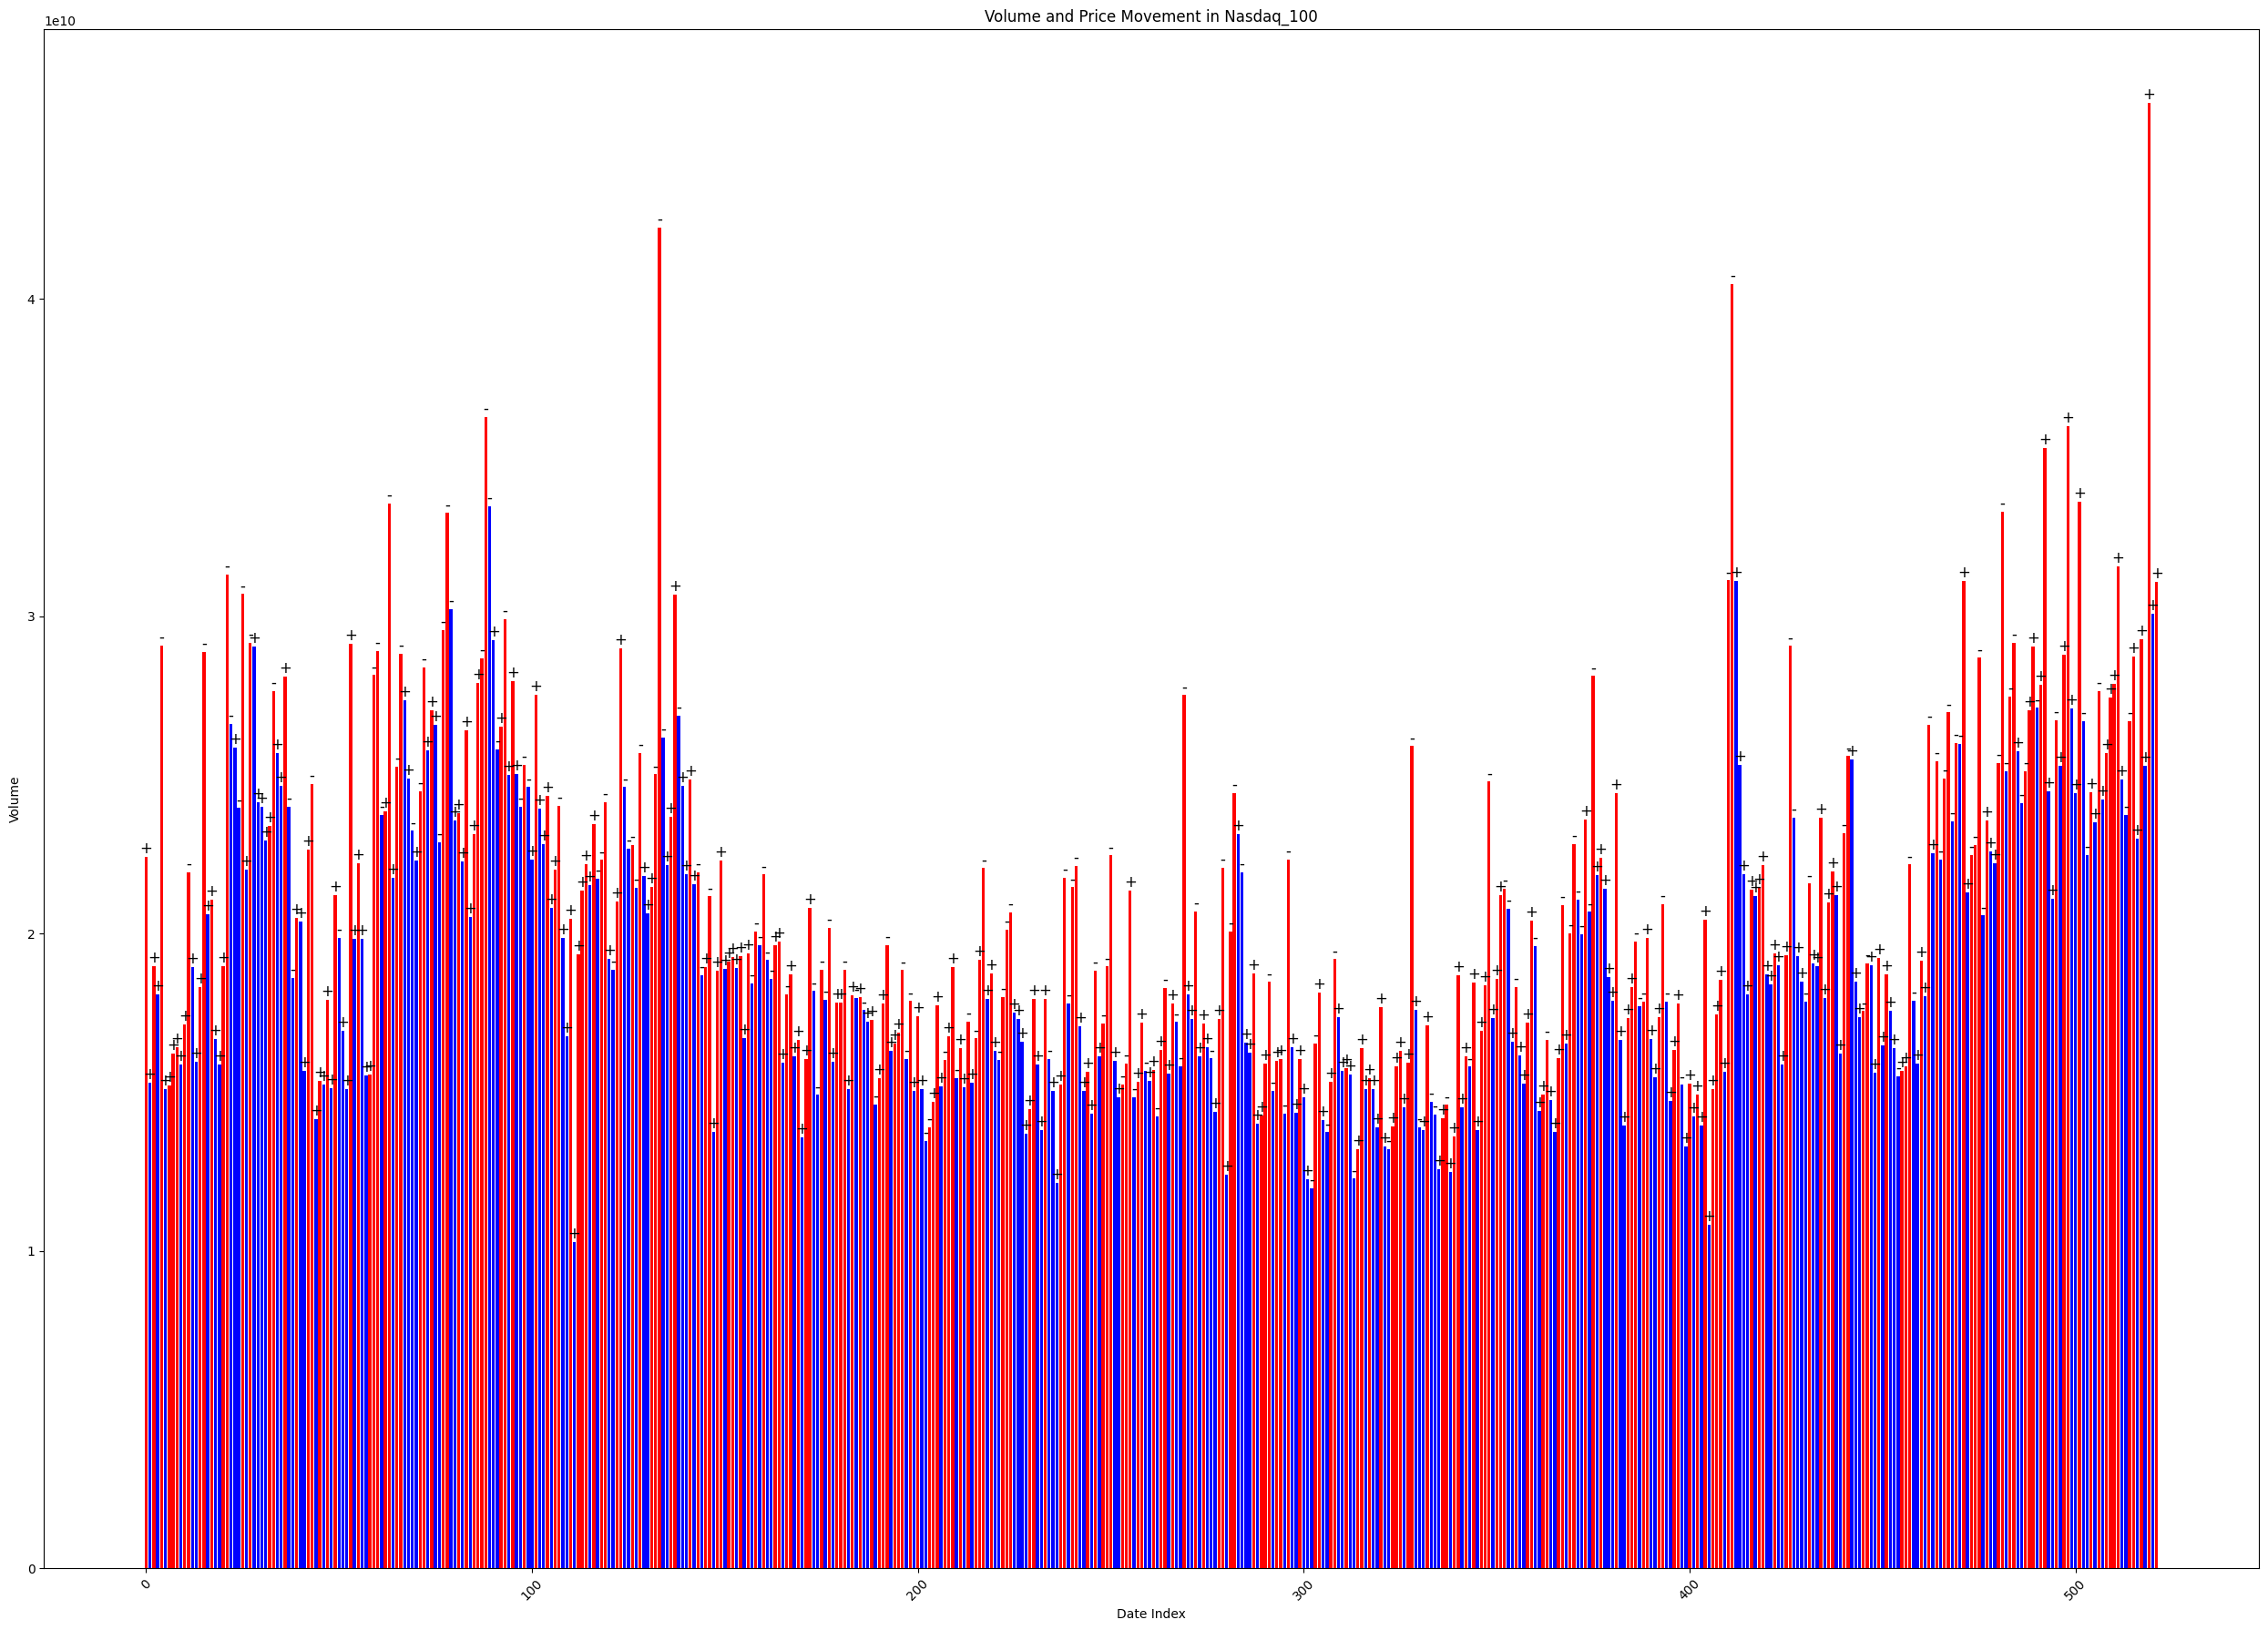

In [153]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 18))
bars = plt.bar(weekly_df_nasdaq.index, weekly_df_nasdaq[target_vol], color=colors) # 막대그래프의 바들을 변수에 저장.

for bar, label in zip(bars, labels):
    height = bar.get_height() # 각 바의 y값을 얻어오기.
    plt.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom', fontsize=12)

plt.xlabel('Date Index')
plt.ylabel('Volume')
plt.title(f'Volume and Price Movement in {target}')
plt.xticks(rotation=45) # x축 label을 45도 정도 돌려서 표시
plt.tight_layout() # 그래프 요소들이 깔끔하게 배치되도록 레이아웃을 자동조정하는 함수
plt.show()

In [154]:
count_plus = 0
count_minus = 0
for color, label in zip(colors, labels):
  if color == 'red' and label== '+':
    count_plus += 1
  elif color == 'red' and label == '-':
    count_minus += 1
print(f'직전시점보다 거래량이 많았고 가격도 오른 횟수 {count_plus}')
print(f'직전시점보다 거래량이 많았고 가격은 빠진 횟수 {count_minus}')

직전시점보다 거래량이 많았고 가격도 오른 횟수 161
직전시점보다 거래량이 많았고 가격은 빠진 횟수 104


In [155]:
count_plus = 0
count_minus = 0
for color, label in zip(colors, labels):
  if color == 'blue' and label== '+':
    count_plus += 1
  elif color == 'blue' and label == '-':
    count_minus += 1
print(f'직전시점보다 거래량이 적었고 가격은 오른 횟수 {count_plus}')
print(f'직전시점보다 거래량이 적었고 가격도 빠진 횟수 {count_minus}')

직전시점보다 거래량이 적었고 가격은 오른 횟수 181
직전시점보다 거래량이 적었고 가격도 빠진 횟수 76


In [174]:
count_price= 0
count_vol = 0
for p, v in zip(weekly_df_nasdaq['Price_change_ratio'], weekly_df_nasdaq['Volume_change_ratio']):
  if p > 10: # 가격변화율이 10프로를 넘었다면
    count_price += 1
  if v > 10: # 거래량변화율이 10프로를 넘었다면
    count_vol += 1
print(f"직전시점과 비교했을 때 가격 변동성이 큰 횟수 {count_price}")
print(f"직전시점과 비교했을 때 가격 변동성이 큰 횟수 {count_vol}")

직전시점과 비교했을 때 가격 변동성이 큰 횟수 32
직전시점과 비교했을 때 가격 변동성이 큰 횟수 309


In [158]:
# 가격이 상승했을 때 얼만큼 올랐는지, 거래량은 얼만큼 변했는지 보고 싶다.
p_diff = []
p = []
v_diff = []
for idx, diff in enumerate(weekly_df_nasdaq['Price_diff']):
  if diff > 0:
    p_diff.append(weekly_df_nasdaq.loc[idx, 'Price_diff']) # weekly_df_nasdaq에서 idx행의 'Price_diff' 열에 있는 값을 골라 p_diff리스트에 넣기
    p.append(weekly_df_nasdaq.loc[idx, target])
    v_diff.append(weekly_df_nasdaq.loc[idx, 'Volume_diff'])
data = pd.DataFrame({ # 새로운 데이터프레임 만들기/필요할 수도 있어서 만듦.
    'Price': p,
    'Price_diff': p_diff,
    'Volume_diff': v_diff
})

In [159]:
data

,Price,Price_diff,Volume_diff
0,2915.38,319.74,3.262429e+09
1,3326.62,411.24,-7.118714e+09
2,3863.11,536.49,3.670143e+09
3,4396.63,533.52,-8.927143e+08
4,4556.89,236.43,-1.397071e+10
...,...,...,...
337,18688.35,357.85,6.269286e+09
338,18998.34,309.99,-3.983571e+09
339,19716.72,718.38,2.089957e+10
340,20102.47,385.75,-1.611371e+10


In [171]:
# 평균적인 주간 수익률을 보기. 단위는 퍼센트임 :.2f로 소수점 둘째자리 표현
print(f"평균적인 주간 수익률 : {weekly_df_nasdaq['Return_rate'].mean():.2f}%")

평균적인 주간 수익률 : 0.87%


In [160]:
for idx, (p, v) in enumerate(zip(weekly_df_nasdaq['Return_rate'], weekly_df_nasdaq['Volume_change_rate'])):
  if p < -10:
    # 이번주에 10프로 넘게 빠졌을 때 향후 2주 동안의 가격 변화를 확인하고 싶다.
    print(f"이번주 주간 수익률 {p}")
    print(f"인덱스 번호 {idx}")
    print(f"향후 2주간의 수익률 {weekly_df_nasdaq.iloc[idx+1:idx+3]['Return_rate'].values.round(2)}") # 이번주의 idx를 기준으로 향후 2주의 값을 표시
    print(f"향후 2주간의 거래량변화율 {weekly_df_nasdaq.iloc[idx+1:idx+3]['Volume_change_rate'].values.round(2)}")
    print("================================================================\n")

이번주 주간 수익률 -14.249541068143698
인덱스 번호 21
향후 2주간의 수익률 [-10.03   2.71]
향후 2주간의 거래량변화율 [-14.99  -2.83]

이번주 주간 수익률 -10.032396179260823
인덱스 번호 22
향후 2주간의 수익률 [ 2.71 -3.32]
향후 2주간의 거래량변화율 [-2.83 -7.38]

이번주 주간 수익률 -12.266466339066714
인덱스 번호 27
향후 2주간의 수익률 [ 7.78 14.62]
향후 2주간의 거래량변화율 [ -0.4  -16.92]

이번주 주간 수익률 -59.49538251142348
인덱스 번호 37
향후 2주간의 수익률 [-63.23  13.03]
향후 2주간의 거래량변화율 [-22.47  10.17]

이번주 주간 수익률 -63.22595441394397
인덱스 번호 38
향후 2주간의 수익률 [13.03 16.28]
향후 2주간의 거래량변화율 [10.17 -0.54]

이번주 주간 수익률 -17.70200259041546
인덱스 번호 60
향후 2주간의 수익률 [-2.3   3.13]
향후 2주간의 거래량변화율 [-17.91   0.54]

이번주 주간 수익률 -88.690730579033
인덱스 번호 76
향후 2주간의 수익률 [-1.58 -3.9 ]
향후 2주간의 거래량변화율 [29.26 12.46]

이번주 주간 수익률 -17.81285663811116
인덱스 번호 411
향후 2주간의 수익률 [5.36 7.64]
향후 2주간의 거래량변화율 [-23.13 -18.62]

이번주 주간 수익률 -13.135281854849893
인덱스 번호 475
향후 2주간의 수익률 [-0.39  3.58]
향후 2주간의 거래량변화율 [-28.31  14.63]



In [168]:
for idx, (p, v) in enumerate(zip(weekly_df_nasdaq['Return_rate'], weekly_df_nasdaq['Volume_change_rate'])):
  if p > 10:
    # 이번주에 10프로 넘게 올랐을 때 향후 2주 동안의 가격 변화를 확인하고 싶다.
    print(f"이번주 주간 수익률 {p}")
    print(f"인덱스 번호 {idx}")
    print(f"향후 2주간의 수익률 {weekly_df_nasdaq.iloc[idx+1:idx+3]['Return_rate'].values.round(2)}")
    print(f"향후 2주간의 거래량변화율 {weekly_df_nasdaq.iloc[idx+1:idx+3]['Volume_change_rate'].values.round(2)}")
    print("================================================================\n")

이번주 주간 수익률 12.318349231788702
인덱스 번호 0
향후 2주간의 수익률 [14.11 16.13]
향후 2주간의 거래량변화율 [-31.74  23.97]

이번주 주간 수익률 14.10587985099712
인덱스 번호 1
향후 2주간의 수익률 [16.13 13.81]
향후 2주간의 거래량변화율 [23.97 -4.7 ]

이번주 주간 수익률 16.127180140803585
인덱스 번호 2
향후 2주간의 수익률 [13.81 -1.73]
향후 2주간의 거래량변화율 [-4.7  60.76]

이번주 주간 수익률 13.81063443702095
인덱스 번호 3
향후 2주간의 수익률 [-1.73  5.47]
향후 2주간의 거래량변화율 [ 60.76 -48.04]

이번주 주간 수익률 12.20481512610574
인덱스 번호 6
향후 2주간의 수익률 [16.94  6.85]
향후 2주간의 거래량변화율 [6.52 1.27]

이번주 주간 수익률 16.93548860269311
인덱스 번호 7
향후 2주간의 수익률 [6.85 4.53]
향후 2주간의 거래량변화율 [ 1.27 -3.26]

이번주 주간 수익률 12.050934197614357
인덱스 번호 14
향후 2주간의 수익률 [-0.95 33.34]
향후 2주간의 거래량변화율 [ 57.75 -28.66]

이번주 주간 수익률 33.33579904236558
인덱스 번호 16
향후 2주간의 수익률 [13.    8.26]
향후 2주간의 거래량변화율 [  2.27 -20.83]

이번주 주간 수익률 13.002235828379263
인덱스 번호 17
향후 2주간의 수익률 [8.26 9.42]
향후 2주간의 거래량변화율 [-20.83  -4.89]

이번주 주간 수익률 12.969520070661053
인덱스 번호 26
향후 2주간의 수익률 [-12.27   7.78]
향후 2주간의 거래량변화율 [32.56 -0.4 ]

이번주 주간 수익률 14.617382452338326
인덱스 번호 29
향후 2주

In [193]:
# 가격이 빠지는 추세에서 거래량이 미미하다가 갑자기 늘었을 때 가격이 어떻게 되는지 확인
# 3주 연속 평균 수익률이 음수면 빠지는 추세로 상정. 거래량 미미는 평균거래량보다 낮을 때를 상정
# trend는 가격이 빠지는 추세에서 거래량이 미미한 주차를 필터링해서 담은 데이터프레임
trend = weekly_df_nasdaq[(weekly_df_nasdaq['Return_rate'].rolling(3).mean() < 0) & (weekly_df_nasdaq[target_vol].rolling(3).mean() < weekly_df_nasdaq[target_vol].mean())]
idx_lst = trend.index.tolist() # 가격이 빠지는 추세에서 거래량이 미미한 주차의 인덱스를 담기
for idx in idx_lst:
  future_data = weekly_df_nasdaq.iloc[idx+1:idx+3] # 빠지는 추세 시점에서 2주 뒤 데이터
  # 데이터프레임의 맨 뒤쪽에서 iloc을 할 때 future_data가 비어있을 수도 있기 때문에 empty함수로 비어있다면 계산 안 하게(그래야 오류 안 나니까)
  # 2주 뒤 데이터에서 거래량이 늘어난 게 하나라도 있는지(any) 확인. 그래야 가격이 빠지는 추세에서 거래량이 미미하다가 갑자기 늘었을 때 가격이 어떻게 되는지 확인 할 수 있으니까
  if not future_data.empty and (future_data[target_vol] > weekly_df_nasdaq[target_vol].mean()).any():
    print(f"인덱스 번호 {idx}")
    print(f"향후 2주간의 수익률 {weekly_df_nasdaq.iloc[idx+1:idx+3]['Return_rate'].values.round(2)}") # 수익률 확인
    print("================================================================\n")

인덱스 번호 40
향후 2주간의 수익률 [14.59  7.88]

인덱스 번호 145
향후 2주간의 수익률 [-1.69  2.27]

인덱스 번호 158
향후 2주간의 수익률 [-0.73 -3.97]

인덱스 번호 159
향후 2주간의 수익률 [-3.97 -0.92]

인덱스 번호 222
향후 2주간의 수익률 [-0.83 -2.3 ]

인덱스 번호 223
향후 2주간의 수익률 [-2.3   1.56]

인덱스 번호 239
향후 2주간의 수익률 [-2.42 -0.28]

인덱스 번호 248
향후 2주간의 수익률 [-0.44 -0.04]

인덱스 번호 249
향후 2주간의 수익률 [-0.04  2.54]

인덱스 번호 278
향후 2주간의 수익률 [-1.86  0.25]

인덱스 번호 280
향후 2주간의 수익률 [-5.91 -3.33]

인덱스 번호 281
향후 2주간의 수익률 [-3.33  0.63]

인덱스 번호 282
향후 2주간의 수익률 [ 0.63 -2.2 ]

인덱스 번호 349
향후 2주간의 수익률 [1.64 1.98]

인덱스 번호 350
향후 2주간의 수익률 [ 1.98 -5.08]

인덱스 번호 369
향후 2주간의 수익률 [-2.68 -1.22]

인덱스 번호 370
향후 2주간의 수익률 [-1.22 -3.28]

인덱스 번호 440
향후 2주간의 수익률 [-4.26  2.71]



In [194]:
weekly_df_nasdaq.iloc[230:245]

,Nasdaq_100,Nasdaq_100_Vol,Price_diff,Volume_diff,Return_rate,Volume_change_rate,Price_change_ratio,Volume_change_ratio
230,3789.51,1.795086e+10,29.94,3.494143e+09,0.796368,24.169689,0.796368,24.169689
231,3835.33,1.588000e+10,45.82,-2.070857e+09,1.209127,-11.536258,1.209127,11.536258
232,3896.90,1.381614e+10,61.57,-2.063857e+09,1.605338,-12.996582,1.605338,12.996582
233,3945.05,1.794257e+10,48.15,4.126429e+09,1.235598,29.866719,1.235598,29.866719
234,3918.44,1.605529e+10,-26.61,-1.887286e+09,-0.674516,-10.518480,0.674516,10.518480
235,3958.93,1.503643e+10,40.49,-1.018857e+09,1.033319,-6.345930,1.033319,6.345930
236,4064.09,1.214186e+10,105.16,-2.894571e+09,2.656273,-19.250392,2.656273,19.250392
237,4081.71,1.524900e+10,17.62,3.107143e+09,0.433553,25.590343,0.433553,25.590343
238,4078.73,2.175443e+10,-2.98,6.505429e+09,-0.073009,42.661345,0.073009,42.661345
239,4022.30,1.780029e+10,-56.43,-3.954143e+09,-1.383519,-18.176266,1.383519,18.176266


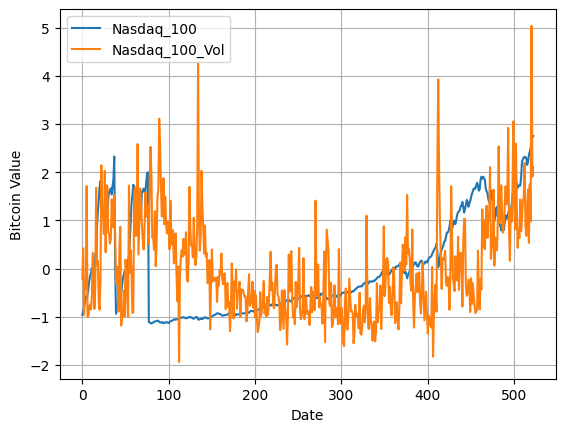

In [161]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

weekly_df_inc = weekly_df.iloc[::-1].reset_index(drop=True)
new_df = weekly_df_inc.copy()
# minmax_scaler = MinMaxScaler()
standard_sclaer = StandardScaler()
# minmax_scaled_df = minmax_scaler.fit_transform(new_df)
standard_scaled_df = standard_sclaer.fit_transform(new_df)
scaled_df = pd.DataFrame(standard_scaled_df)
change_col_name(scaled_df, column_names)

draw_graph([scaled_df], columns=[target, target_vol])

In [162]:
scaled_df

,Bitcoin,Bitcoin_Vol,Copper,Copper_Vol,Crude_Oil_WTI,Crude_Oil_WTI_Vol,Gold,Gold_Vol,Nasdaq_100,Nasdaq_100_Vol
0,-0.765890,-0.117458,0.357468,-0.555899,0.934362,-0.794310,0.404037,-0.792724,-0.962044,-0.212985
1,-0.753704,-0.118082,-0.007566,-0.390911,1.135302,-1.379522,-0.423089,0.230224,-0.894676,0.420607
2,-0.744977,-0.118114,-0.284991,-0.003691,1.370872,-0.975411,-0.759946,-0.879381,-0.808031,-0.961908
3,-0.680079,-0.117968,-0.460207,0.081226,-0.412988,-0.332041,-0.785866,-0.956392,-0.694996,-0.249135
4,-0.400035,-0.117691,-1.044261,-0.619530,-1.044516,-0.565657,-1.074474,-0.806376,-0.582586,-0.422508
...,...,...,...,...,...,...,...,...,...,...
518,2.288839,-0.117992,2.007419,0.122394,0.212616,-0.208969,2.783284,-0.173586,2.428589,1.749659
519,2.351500,-0.118133,1.788399,0.094496,0.267749,-0.697657,2.726175,-0.216476,2.493902,0.976015
520,2.968602,-0.117797,1.627784,-0.461834,0.434516,-0.928361,2.694689,-1.328672,2.645260,5.034890
521,3.405641,-0.117705,1.817601,1.233377,0.484182,-0.472544,2.796195,0.043157,2.726535,1.905469


In [166]:
scaled_df[[target, target_vol]].corr()

,Nasdaq_100,Nasdaq_100_Vol
Nasdaq_100,1.000000,0.344492
Nasdaq_100_Vol,0.344492,1.000000
